## Funciones de distribución de probabilidades
### Distribución uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
a = 1
b = 100
n = 1000000
data = np.random .uniform(a, b, n)

(array([ 99968.,  99689., 100115., 100340., 100393., 100009.,  99838.,
        100005.,  99862.,  99781.]),
 array([ 1.00009331, 10.90007682, 20.80006034, 30.70004386, 40.60002738,
        50.5000109 , 60.39999441, 70.29997793, 80.19996145, 90.09994497,
        99.99992848]),
 <BarContainer object of 10 artists>)

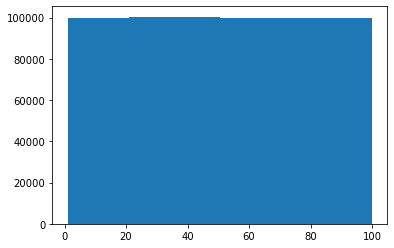

In [4]:
%matplotlib inline
plt.hist(data)

## Distribucion normal

In [5]:
data  = np.random.randn(1000000)

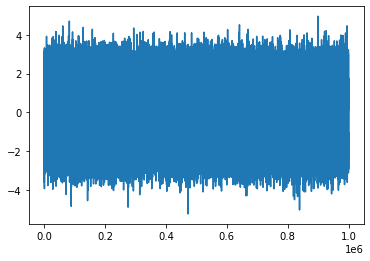

In [6]:
x = range(1, 1000001)
plt.plot(x, data)# cumple con ser una distribucion normal

(array([1.20000e+01, 6.41000e+02, 1.35140e+04, 1.06691e+05, 3.19802e+05,
        3.68372e+05, 1.62218e+05, 2.69120e+04, 1.79600e+03, 4.20000e+01]),
 array([-5.24908661, -4.22823889, -3.20739117, -2.18654345, -1.16569572,
        -0.144848  ,  0.87599972,  1.89684744,  2.91769516,  3.93854289,
         4.95939061]),
 <BarContainer object of 10 artists>)

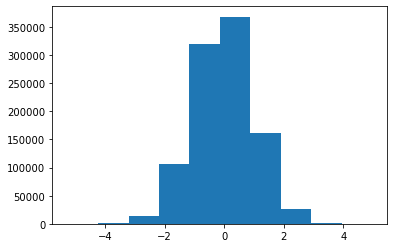

In [7]:
plt.hist(data)

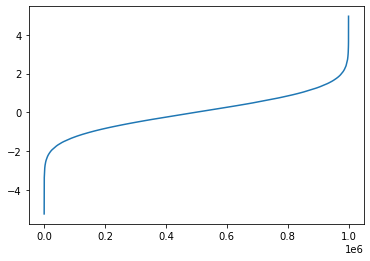

In [8]:
plt.plot(x, sorted(data))#funcion de distribucion acomulada

(array([2.200e+01, 2.630e+02, 1.152e+03, 2.624e+03, 3.284e+03, 1.946e+03,
        6.000e+02, 1.000e+02, 8.000e+00, 1.000e+00]),
 array([-3.51886845, -1.40598204,  0.70690438,  2.81979079,  4.9326772 ,
         7.04556361,  9.15845003, 11.27133644, 13.38422285, 15.49710926,
        17.60999568]),
 <BarContainer object of 10 artists>)

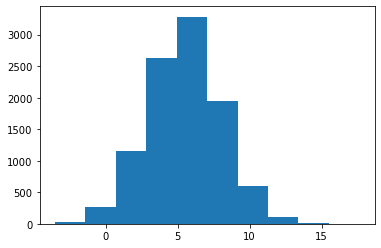

In [9]:
mu = 5.5
sd = 2.5
z_10000 = np.random.randn(10000)
data = mu + sd * z_10000# z = (X - mu) / sd -> N(0,1), X = mu + sd * z
plt.hist(data)

In [10]:
data = np.random.randn(2, 4)
data
# Sirve para generar datasets aleatorios

array([[ 0.00243908, -0.78136006, -0.00463088,  0.15172055],
       [ 1.03498169,  0.12236921,  1.37575974,  0.35674183]])

## Simulación de Monte Carlo

* Generamos dos números aleatorios uniformes x e y entre 0 y 1
* Calcularemos x² + y²
       *Si el valor es inferior a 1 -> estamos dentro del círculo.
       *Si el valor es superior a 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total
  de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (por ejemplo 1000), para obtener (1000) diferentes
  aproximaciones de pi.
* Calculamos el promedio de los 1000 experimentos anteriores para dar un valor final de pi.

In [27]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(a):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])

            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/a
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.14432


(3.14432, [<matplotlib.lines.Line2D at 0x24ad37ba880>])

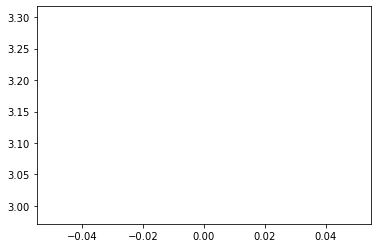

In [28]:
pi_montecarlo(100000, 200)

### Dummy Data Sets

In [30]:
n = 1000000
data = pd.DataFrame(
    {
        'A': np.random.randn(n),
        'B': 1.5 + 2.5 * np.random.randn(n),
        'C': np.random.uniform(2, 32, n)
    }
)

In [32]:
data.head()

,A,B,C
0,-0.531040,3.996360,9.653291
1,0.605742,4.469958,26.269242
2,-0.155519,2.426608,3.681358
3,-1.800355,1.039663,9.211020
4,-1.200454,2.518401,22.405364


In [33]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001688,1.498162,17.000327
std,1.000851,2.498296,8.662399
min,-4.625367,-10.237759,2.000040
25%,-0.675552,-0.184652,9.497271
50%,-0.001451,1.494017,16.986519
75%,0.672259,3.182478,24.500125
max,4.846562,13.537786,31.999919


(array([1.13000e+02, 3.09300e+03, 3.42050e+04, 1.64219e+05, 3.43024e+05,
        3.10885e+05, 1.21818e+05, 2.10110e+04, 1.58300e+03, 4.90000e+01]),
 array([-4.62536651, -3.67817371, -2.73098091, -1.78378811, -0.83659531,
         0.11059749,  1.0577903 ,  2.0049831 ,  2.9521759 ,  3.8993687 ,
         4.8465615 ]),
 <BarContainer object of 10 artists>)

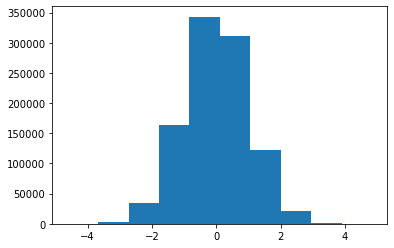

In [34]:
plt.hist(data['A'])

(array([6.70000e+01, 2.56200e+03, 2.99410e+04, 1.54015e+05, 3.38233e+05,
        3.19304e+05, 1.31153e+05, 2.29020e+04, 1.77700e+03, 4.60000e+01]),
 array([-10.23775928,  -7.86020471,  -5.48265014,  -3.10509557,
         -0.72754099,   1.65001358,   4.02756815,   6.40512272,
          8.78267729,  11.16023186,  13.53778644]),
 <BarContainer object of 10 artists>)

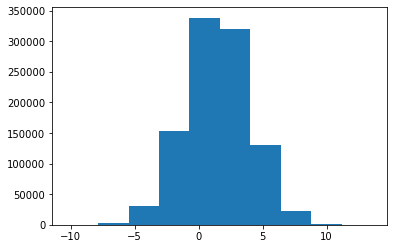

In [35]:
plt.hist(data['B'])

(array([ 99538., 100468., 100117., 100023., 100344.,  99841.,  99809.,
         99759.,  99576., 100525.]),
 array([ 2.00003955,  5.00002747,  8.00001538, 11.0000033 , 13.99999122,
        16.99997914, 19.99996705, 22.99995497, 25.99994289, 28.99993081,
        31.99991872]),
 <BarContainer object of 10 artists>)

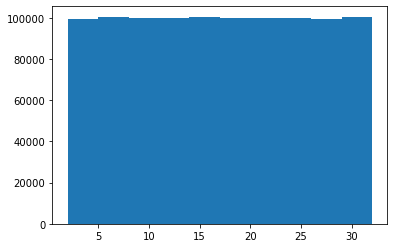

In [36]:
plt.hist(data['C'])

In [37]:
df = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [38]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [46]:
column_names = df.columns.values.tolist()

In [47]:
a = len(column_names)
a

21

In [49]:
new_data = pd.DataFrame(
    {
        "Column Name": column_names,
        "A": np.random.randn(a),
        "B": np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [50]:
new_data

,Column Name,A,B
42,State,1.337114,0.251870
43,Account Length,1.212917,0.257987
44,Area Code,-0.938925,0.943808
45,Phone,0.773366,0.578720
46,Int'l Plan,-0.525058,0.802483
47,VMail Plan,0.929948,0.097366
48,VMail Message,1.249653,0.098044
49,Day Mins,0.847401,0.372050
50,Day Calls,0.416662,0.929551
51,Day Charge,-0.076085,0.582685
